In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [13]:
student = pd.read_csv(rf"C:\Users\thuhi\pythonlearn\mlproject\notebook\data\stud.csv")
student.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
student.parental_level_of_education.value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [39]:
# Define the correct order
education_order = ['some high school', 'high school', 'some college', 
                   'associate\'s degree', 'bachelor\'s degree', 'master\'s degree']

# Create a mapping to integers (0 to 5)
label_mapping = {level: i for i, level in enumerate(education_order)}

# Apply the mapping
student['parental_level_of_education_Encoded'] = student['parental_level_of_education'].map(label_mapping)

print("\nEncoded Data with Custom Order:")
student.head()


Encoded Data with Custom Order:


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,parental_level_of_education_Encoded
0,female,group B,bachelor's degree,standard,none,72,72,74,4
1,female,group C,some college,standard,completed,69,90,88,2
2,female,group B,master's degree,standard,none,90,95,93,5
3,male,group A,associate's degree,free/reduced,none,47,57,44,3
4,male,group C,some college,standard,none,76,78,75,2


In [52]:
student["test_preparation_encoded"]=student.test_preparation_course.map(lambda x: 0 if x == 'none' else 1)
student["male"] = student.gender.map(lambda x: 1 if x == 'male' else 0)
student.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,parental_level_of_education_Encoded,test_preparation_encoded,male
0,female,group B,bachelor's degree,standard,none,72,72,74,4,0,0
1,female,group C,some college,standard,completed,69,90,88,2,1,0
2,female,group B,master's degree,standard,none,90,95,93,5,0,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,3,0,1
4,male,group C,some college,standard,none,76,78,75,2,0,1


In [ ]:
student.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [53]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(student.loc[:,['race_ethnicity','lunch']])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Combine with remaining columns
remaining_data = student.iloc[:, 5:]
final_df = pd.concat([encoded_df, remaining_data.reset_index(drop=True)], axis=1)
final_df["average_score"] = final_df.loc[:,['math_score','reading_score','writing_score']].mean(axis=1)

<Axes: >

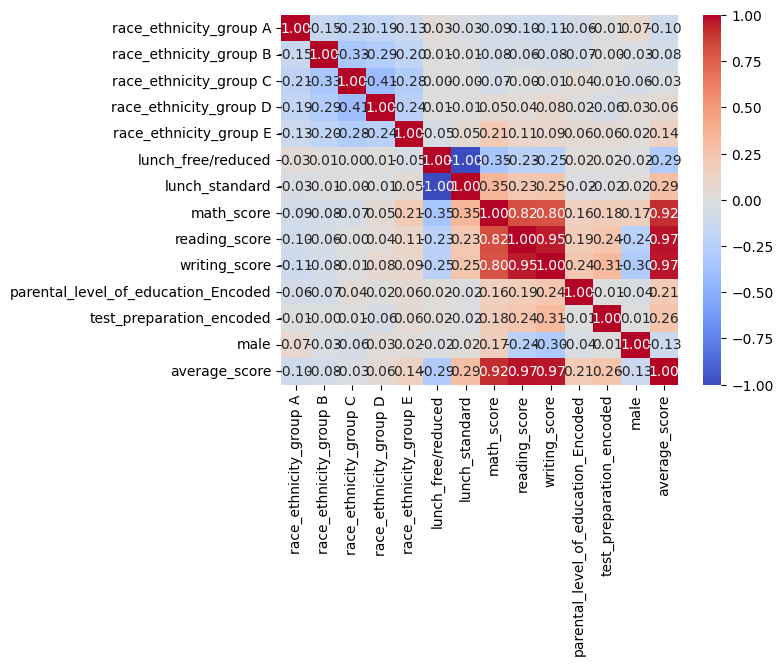

In [54]:
corr_matrix = final_df.corr()
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True,fmt=".2f")